In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")
# importing necessary libraries 

In [31]:
df = pd.read_csv(r"C:\Users\aadit\Downloads\Mall_Customers.csv")
#importing dataset

In [32]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [33]:
column_names = ['Annual Income (k$)','Age','Spending Score (1-100)']
features = df[column_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features,columns=column_names)
scaled_features.head()
#scaling the data

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


In [34]:
gender = df['Gender']
df1 = scaled_features.join(gender)

df1 = pd.get_dummies(df1)
df1 
#one hot encoding

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female,Gender_Male
0,-1.738999,-1.424569,-0.434801,0,1
1,-1.738999,-1.281035,1.195704,0,1
2,-1.700830,-1.352802,-1.715913,1,0
3,-1.700830,-1.137502,1.040418,1,0
4,-1.662660,-0.563369,-0.395980,1,0
...,...,...,...,...,...
195,2.268791,-0.276302,1.118061,1,0
196,2.497807,0.441365,-0.861839,1,0
197,2.497807,-0.491602,0.923953,0,1
198,2.917671,-0.491602,-1.250054,0,1


In [35]:
df1=df1.drop(['Gender_Female'],axis=1)

In [36]:
df1

,Annual Income (k$),Age,Spending Score (1-100),Gender_Male
0,-1.738999,-1.424569,-0.434801,1
1,-1.738999,-1.281035,1.195704,1
2,-1.700830,-1.352802,-1.715913,0
3,-1.700830,-1.137502,1.040418,0
4,-1.662660,-0.563369,-0.395980,0
...,...,...,...,...
195,2.268791,-0.276302,1.118061,0
196,2.497807,0.441365,-0.861839,0
197,2.497807,-0.491602,0.923953,1
198,2.917671,-0.491602,-1.250054,1


In [37]:
SSE =[]

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df1)
    SSE.append(kmeans.inertia_)
#building the cluster model

In [38]:
frame = pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})
frame

,Cluster,SSE
0,1,649.280000
1,2,438.522412
2,3,344.405429
3,4,254.282907
4,5,216.784902
5,6,181.951436
6,7,167.605322
7,8,150.981114
8,9,140.273524


Text(0, 0.5, 'Inertia')

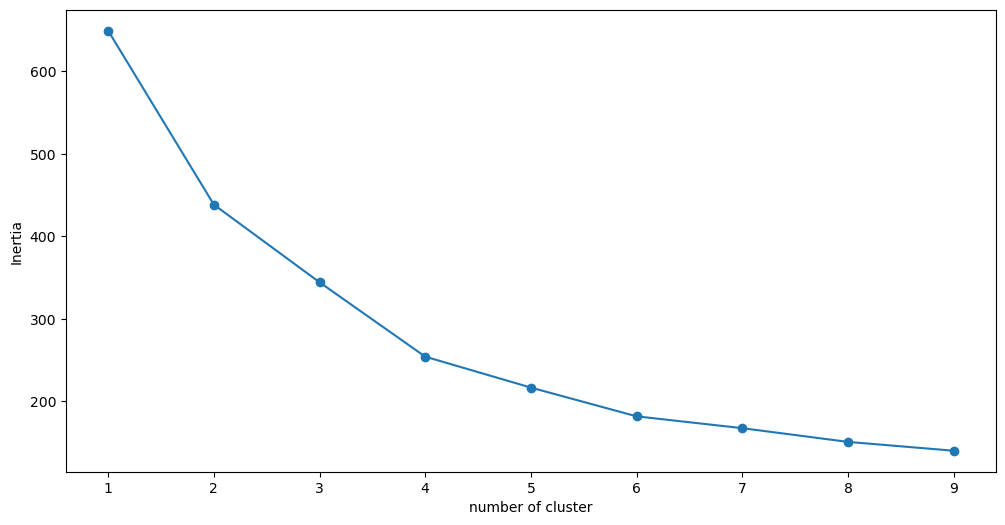

In [39]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('number of cluster')
plt.ylabel('Inertia')
#ploting the inertia

In [41]:
#silhouette coefficient
kmeans = KMeans(n_clusters=4,init='k-means++')
kmeans.fit(df1)
print(silhouette_score(df1,kmeans.labels_,metric='euclidean'))
#35 is not a good score

0.35027020434653977


In [42]:
newdf = df1

In [43]:
newdf

,Annual Income (k$),Age,Spending Score (1-100),Gender_Male
0,-1.738999,-1.424569,-0.434801,1
1,-1.738999,-1.281035,1.195704,1
2,-1.700830,-1.352802,-1.715913,0
3,-1.700830,-1.137502,1.040418,0
4,-1.662660,-0.563369,-0.395980,0
...,...,...,...,...
195,2.268791,-0.276302,1.118061,0
196,2.497807,0.441365,-0.861839,0
197,2.497807,-0.491602,0.923953,1
198,2.917671,-0.491602,-1.250054,1


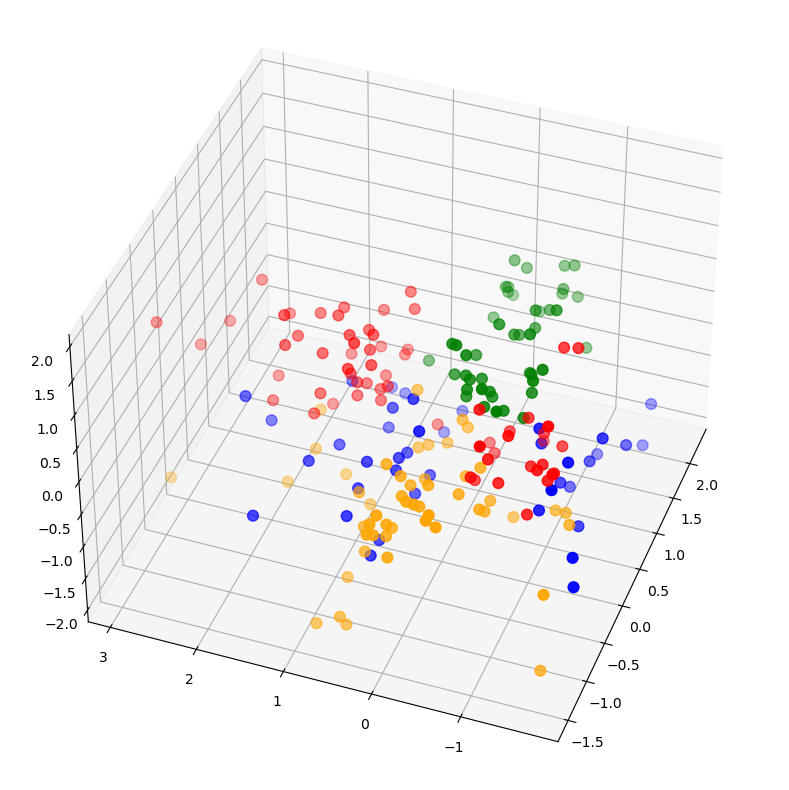

In [44]:
clusters = kmeans.fit_predict(newdf.iloc[:,1:])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)

ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(40, 200)
plt.show()
#visualising in 3d plots 
#this shows that the group is overlapping

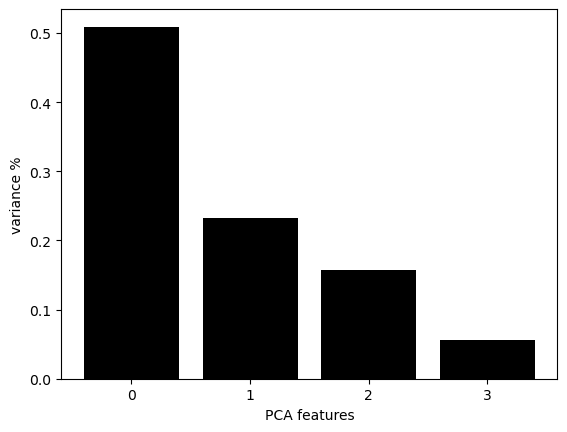

In [57]:
#Principal Component Analysis
# When we run PCA on a data frame, new components are created. These components explain the maximum variance in the model
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_,color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)
#Based on this visualization, we can see that the first PCA component explain around 70% of the dataset variance
#lets take the first 2 components and build the model again

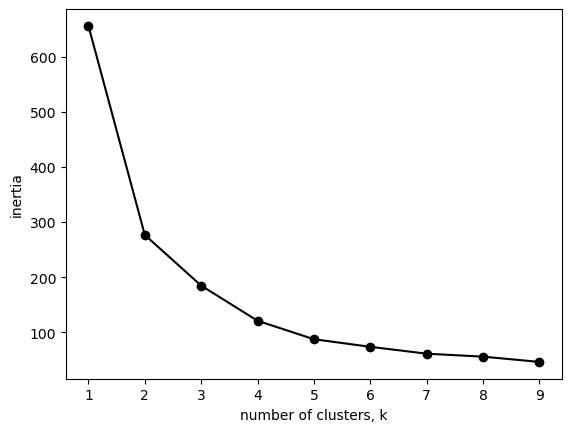

In [58]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias,'-o',color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
#it looks like the optimal number of clusters is 5

In [66]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

print(silhouette_score(PCA_components.iloc[:,:2],model.labels_,metric='euclidean'))
#We can calculate the silhouette score for this model with 5 clusters
#we are getting 50% better than previous model

0.5053310935893819


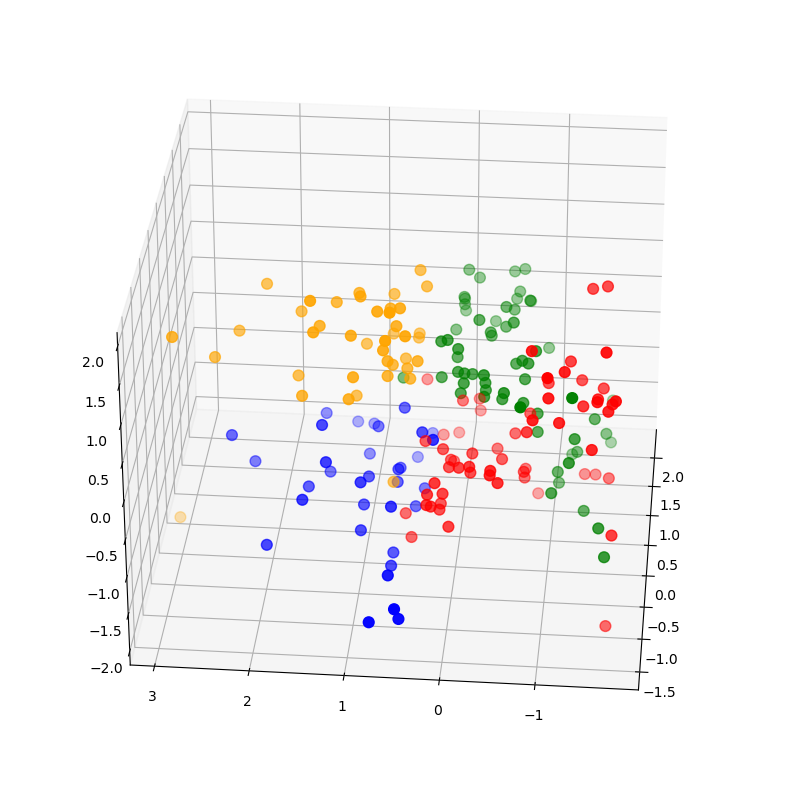

In [65]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()
#visualizing the new model in 3d plot

In [67]:
df = pd.read_csv(r"C:\Users\aadit\Downloads\Mall_Customers.csv")
# lets map the clusters back to the dataset and take a look at the head of the data frame

In [68]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [69]:
df = df.drop(['CustomerID'],axis=1)

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [70]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df
#To compare attributes of the different clusters, lets find the average of all variables across each cluster

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,26.193548,42.516129,57.951613
1,1,54.000000,46.809524,41.174603
2,2,32.560976,87.512195,79.536585
3,3,41.441176,86.441176,17.411765


<AxesSubplot:xlabel='cluster', ylabel='Age'>

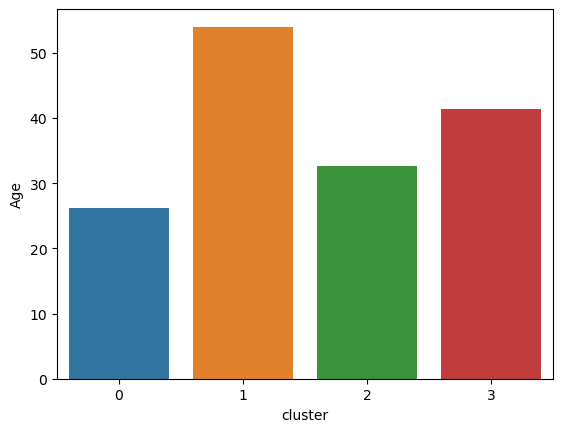

In [71]:
sns.barplot(x='cluster',y='Age',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

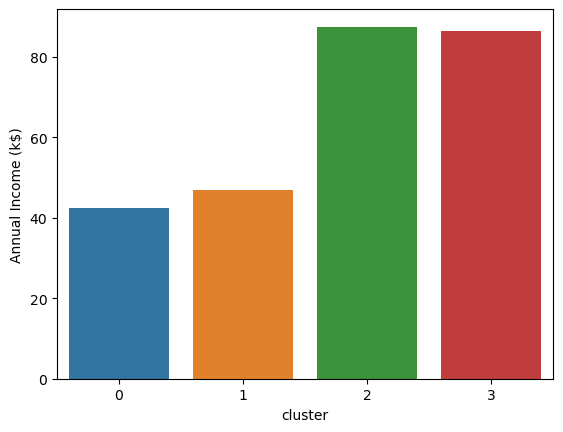

In [72]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

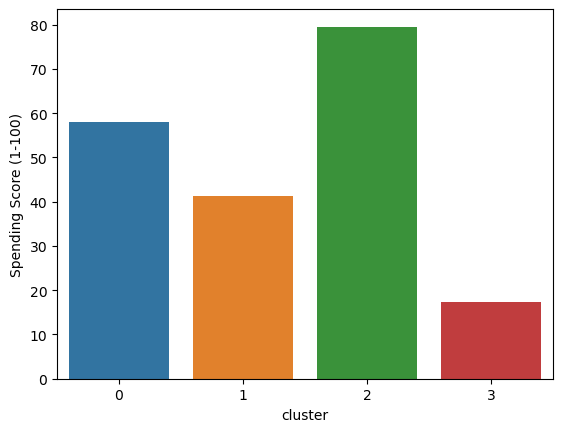

In [74]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

In [75]:
df2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())

In [76]:
df2
#gender breakdown

Gender
cluster Gender        
0       Female      40
        Male        22
1       Female      35
        Male        28
2       Female      22
        Male        19
3       Female      15
        Male        19

## Main attributes of each segment

### Cluster 0:
    average annual income, high spending score.
    Mean age is around 25 and gender is predominantly female.
### Cluster 1:
    average annual income, average spending score.
    Mean age is around 50 and gender is predominantly female.
### Cluster 2:
    high annual income, high spending score.
    Mean age is around 30 and gender is predominantly female.
### Cluster 3:
    high annual income, low spending score.
    Mean age is around 40 and gender is predominantly male.
    
#### females are more highly represented in the entire dataset, which is why most clusters contain a larger number of females than males

## Building personas around each cluster

### Cluster 0: The careless buyer
This segment is made up of a younger age group.

Individuals in this segment are most likely first jobbers. They make the least amount of money compared to all other segments.

However, they are very high spenders.

These are enthusiastic young individuals who enjoy living a good lifestyle, and tend to spend above their means.

Recommendation: Since these are young individuals who spend a lot, providing them with travel coupons or hotel discounts might be a good idea. Providing them with discounts off top clothing and makeup brands would also work well for this segment.

### Cluster 1: Almost retired
This segment comprises of an older group of people.

They earn less and spend less, and are probably saving up for retirement.

Recommendation: Marketing to these individuals can be done through Facebook, which appeals to an older demographic. Promote healthcare related products to people in this segment.

### Cluster 2: Highly affluent individuals

This segment is made up of middle-aged individuals.

These are individuals who have worked hard to build up a significant amount of wealth.

They also spend large amounts of money to live a good lifestyle.

These individuals have likely just started a family, and are leading baby or family-focused lifestyles. It is a good idea to promote baby or child related products to these individuals.

Recommendation: Due to their large spending capacity and their demographic, these individuals are likely to be looking for properties to buy or invest in. They are also more likely than all other segments to take out housing loans and make serious financial commitments.

### Cluster 3: The frugal spender

This persona comprises of middle aged(40's) individuals who are very careful with money.

Despite having the highest average income compared to individuals in all other clusters, they spend the least.

This might be because they have financial responsibilities - like saving up for their kid's higher education.

Recommendation: Promos, coupons, and discount codes will attract individuals in this segment due to their tendency to spend less.